# Midterm Exam 💙 💛 

## Linear Regression

In [847]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [848]:
df = load_diabetes(as_frame=True, scaled=False)
df = df['frame']

In [849]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [850]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


1. Split the data set into a training and test set

In [851]:
# put your answer here
X = df.drop(['target'],axis=1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

2. Use the `the MinMaxScaler()` method to scale down the training and test set.

In [852]:
# put your answer here
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Create a new instance of the `LinearRegression` class. `(5 points)`

In [853]:
# put your answer here
lr_model = LinearRegression()

4. Use the `fit()` method to train the linear regression model using the scaled training set. `(5 points)`

In [854]:
# put your answer here
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

5. Use the `predict()` method to make predictions using the scaled test set. `(5 points)`

In [855]:
# put your answer here
y_pred = lr_model.predict(X_test_scaled)

6. Display the intercept, slope and $R^2$. `(5 points)`

In [856]:
# put your answer here
print(lr_model.intercept_)
print(lr_model.coef_)
r2 = r2_score(y_test, y_pred)
r2

-16.535799535952776
[-2.29890624e-01 -1.97468262e+01  1.42289209e+02  6.91674888e+01
 -3.35696721e+02  1.80844072e+02  1.11667898e+02  1.12949718e+02
  2.07289043e+02  3.23535008e+01]


0.473247633089351

7. Write a  `normal_equation()` function to get the intercept and slopes by using the **Normal equation**.

In [857]:
# put your answer here
def normal_equation(X, y):

    ones = np.ones((X.shape[0], 1))
    X = np.append(ones, X, axis=1)
    result = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return result, result[0], result[1:]

8. Call the `normal_equation()` function and pass the  scaled training set. The function should display the intercept and slopes.

In [858]:
# Put your answer here
normal_equation(X_train_scaled, y_train)

(array([-1.65357995e+01, -2.29890624e-01, -1.97468262e+01,  1.42289209e+02,
         6.91674888e+01, -3.35696721e+02,  1.80844072e+02,  1.11667898e+02,
         1.12949718e+02,  2.07289043e+02,  3.23535008e+01]),
 -16.535799535959086,
 array([-2.29890624e-01, -1.97468262e+01,  1.42289209e+02,  6.91674888e+01,
        -3.35696721e+02,  1.80844072e+02,  1.11667898e+02,  1.12949718e+02,
         2.07289043e+02,  3.23535008e+01]))

9. 

In [859]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s
   
# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001

    for i in range(epoch):
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

/var/folders/lj/8s5qp0cj4mnfrfh3nbj958l00000gp/T/ipykernel_2452/489486013.py:13: RuntimeWarning: overflow encountered in double_scalars
  s+=(y[i]-y_predicted[i])**2
/var/folders/lj/8s5qp0cj4mnfrfh3nbj958l00000gp/T/ipykernel_2452/489486013.py:21: RuntimeWarning: overflow encountered in add
  s+=-x[i]*(y[i]-y_predicted[i])
/var/folders/lj/8s5qp0cj4mnfrfh3nbj958l00000gp/T/ipykernel_2452/489486013.py:46: RuntimeWarning: invalid value encountered in subtract
  weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted)


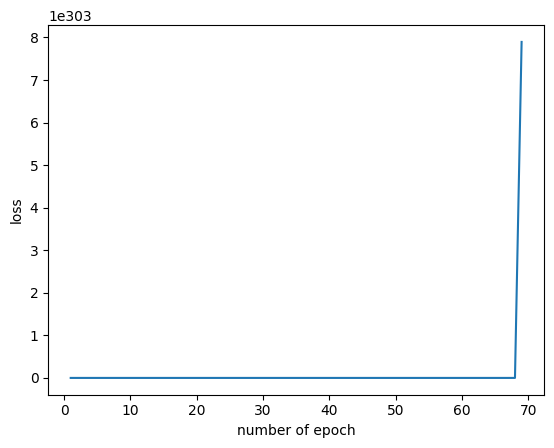

In [860]:
X = df.drop(['target'],axis=1).values
y = df['target'].values

m,b = gradient_descent(X, y)


In [861]:
print(m)
print(b)

[nan nan nan nan nan nan nan nan nan nan]
nan
